In [6]:
#importing necessary libraries
import numpy as np
import pandas as pd
import utilities as u
import matplotlib.pyplot as plt

#reading csv files into data frames
df_seattle = pd.read_csv('./SEATTLE/listings.csv')
df_boston = pd.read_csv('./BOSTON/listings.csv')

In [7]:
#removing text columns from the dataframes
df_bost_clean = df_boston.drop(['id','listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','transit', 
                'neighborhood_overview','notes','access','thumbnail_url','host_url','medium_url',
                'picture_url', 'house_rules','interaction','xl_picture_url','host_id','host_name','host_location',
                'host_about','host_thumbnail_url','host_picture_url', 'street','state','zipcode', 'market',
                 'smart_location','country_code','country','license', 'jurisdiction_names'], axis=1)

df_seat_clean = df_seattle.drop(['id','listing_url','scrape_id','last_scraped','name',
                'summary','space','description','experiences_offered','transit', 
         'neighborhood_overview','notes','thumbnail_url','host_url','medium_url',
        'picture_url','xl_picture_url','host_id','host_name','host_location',
        'host_about','host_thumbnail_url','host_picture_url', 'street','state','zipcode', 'market',
         'smart_location','country_code','country','license', 'jurisdiction_names'], axis=1)

In [8]:
#convert all amount columns into numeric value
df_bost = u.convert_amount(df_bost_clean.copy(), ['security_deposit','price','monthly_price','cleaning_fee','weekly_price', 'extra_people'])
df_seat = u.convert_amount(df_seat_clean.copy(), ['security_deposit','price','monthly_price','cleaning_fee','weekly_price', 'extra_people'])

In [9]:
#drop all columns where property type is na
df_bost_clean = df_bost.dropna(subset=['property_type'],axis=0)
df_seat_clean = df_seat.dropna(subset=['property_type'],axis=0)

In [11]:
df_bost_clean['price']
#'monthly_price','weekly_price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3582, dtype: float64

In [13]:
#fill all na price columns with mean
df_bost_final = pd.concat([u.fill_nan_data(df_bost_clean[['price','monthly_price','weekly_price']],False),df_bost_clean['property_type']],axis=1)
df_seat_final = pd.concat([u.fill_nan_data(df_seat_clean[['price','monthly_price','weekly_price']],False),df_seat_clean['property_type']],axis=1)

/usr/lib/python3/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
#propert_type count
prop_bost = df_bost_final['property_type'].value_counts().to_frame(name='Property_type_count_Boston').reset_index()
prop_seat = df_seat_final['property_type'].value_counts().to_frame(name='Property_type_count_Seattle').reset_index()

,index,Property_type_count_Boston,Property_type_count_Seattle
0,Apartment,72.920156,45.402148
1,House,15.689559,44.747184
2,Condominium,6.448911,3.091433
3,Townhouse,1.507538,2.384071
4,Bed & Breakfast,1.144612,1.047943
5,Loft,1.088777,0.969348
6,Other,0.474595,0.576369
7,Boat,0.335008,0.550170
8,Villa,0.167504,0.340582
9,Entire Floor,0.111669,0.340582


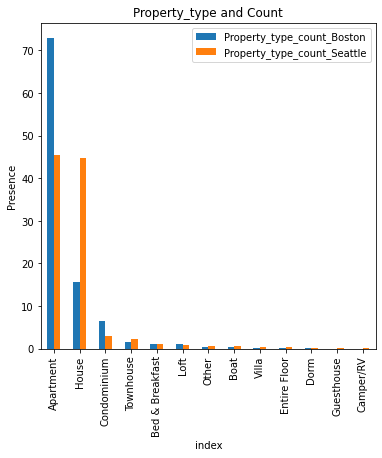

In [15]:
prop_bost['Property_type_count_Boston'] = prop_bost['Property_type_count_Boston']*100/df_bost_final.shape[0]
prop_seat['Property_type_count_Seattle'] = prop_seat['Property_type_count_Seattle']*100/df_seat_final.shape[0]
df = pd.concat([prop_bost,prop_seat['Property_type_count_Seattle']],axis=1)
df.dropna(axis=0, inplace=True)
df.plot(x='index',kind='bar',figsize=(6,6)).set(ylabel='Presence', title="Property_type and Count")
df

[Text(0, 0.5, 'Price($)')]

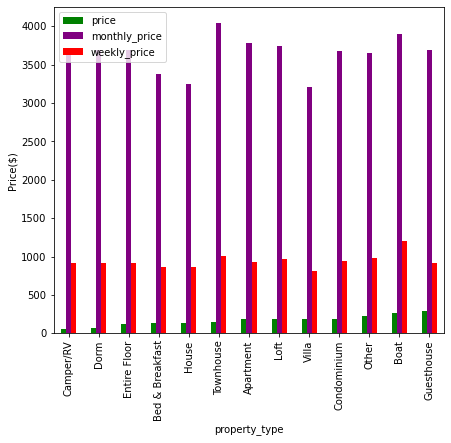

In [16]:
#price variation with property type for boston listings
df_bost_prop = df_bost_final.groupby(['property_type']).mean()[['price','monthly_price','weekly_price']].reset_index()
df_bost_prop.sort_values(by=['price']).plot(x='property_type',y=['price','monthly_price','weekly_price'],kind='bar',color=['green','purple','red'], figsize=(7,6)).set(ylabel = 'Price($)')

[Text(0, 0.5, 'Price($)')]

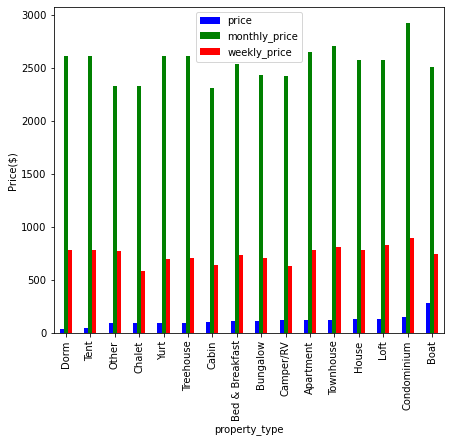

In [17]:
#price variation with property type for seaton listings
df_seat_prop = df_seat_final.groupby(['property_type']).mean()[['price','monthly_price','weekly_price']].reset_index()
df_seat_prop.sort_values(by=['price']).plot(x='property_type',y=['price','monthly_price','weekly_price'],kind='bar',color=['blue','green','red'], figsize=(7,6)).set(ylabel = 'Price($)')

In [18]:
type(df_bost_prop)
#['monthly_price']

pandas.core.frame.DataFrame

In [19]:
df_seat_prop.sort_values(by=['price'])

,property_type,price,monthly_price,weekly_price
8,Dorm,39.500000,2614.004617,788.600598
12,Tent,54.000000,2614.004617,788.600598
11,Other,94.681818,2330.548813,773.482117
6,Chalet,98.500000,2325.000000,587.500000
15,Yurt,100.000000,2614.004617,695.000000
14,Treehouse,101.000000,2614.004617,712.866866
4,Cabin,104.666667,2308.479489,647.381237
1,Bed & Breakfast,112.054054,2539.867985,741.913804
3,Bungalow,115.615385,2431.695149,713.200276
5,Camper/RV,120.461538,2426.311244,636.400322


In [20]:
df_bost_prop.sort_values(by=['price'])

,property_type,price,monthly_price,weekly_price
3,Camper/RV,60.000000,3692.097973,922.392377
5,Dorm,62.500000,3692.097973,922.392377
6,Entire Floor,122.000000,3692.097973,922.392377
1,Bed & Breakfast,129.365854,3378.620221,864.003992
8,House,131.599644,3247.412835,868.916330
11,Townhouse,149.037037,4048.874312,1004.479115
0,Apartment,181.966692,3786.425655,929.002130
9,Loft,185.410256,3738.388080,970.491376
12,Villa,189.500000,3210.081644,810.326981
4,Condominium,190.246753,3676.358064,944.798323
